# **HR Analytics - Atriction Prediction**

Our company needs to understand which factors are influencing employees to leave the company

# Importing Libs

In [202]:
# Imports
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve
from sklearn.feature_selection import RFECV
pd.set_option('display.max_columns', None)
import scipy.stats as stats
import modeling_tools
import re
from scikitplot import metrics as skplot

# Data dictionary

In [203]:
dicionario = {'Age': 'Idade do funcionário',

'Attrition': 'Tipo de atrito (demissão voluntária, etc.)',

'BusinessTravel': 'Frequência de viagens a negócios',

'Department': 'Departamento de trabalho',

'DistanceFromHome': 'Distância de casa ao trabalho',

'Education': 'Nível de educação',

'EducationField': 'Área de estudo',

'EnvironmentSatisfaction': 'Satisfação com o ambiente de trabalho',

'Gender': 'Gênero do funcionário',

'JobInvolvement': 'Envolvimento no trabalho',

'JobLevel': 'Nível do trabalho',

'JobRole': 'Função do trabalho',

'JobSatisfaction': 'Satisfação com o trabalho',

'MaritalStatus': 'Estado civil',

'MonthlyIncome': 'Renda mensal',

'NumCompaniesWorked': 'Número de empresas em que já trabalhou',

'Over18': 'Se o funcionário é maior de 18 anos',

'OverTime': 'Se faz hora extra',

'PercentSalaryHike': 'Percentual de aumento salarial',

'PerformanceRating': 'Avaliação de desempenho',

'RelationshipSatisfaction': 'Satisfação com os relacionamentos no trabalho',

'StandardHours': 'Horas padrão de trabalho'}

In [204]:
dicionario['Attrition']

'Tipo de atrito (demissão voluntária, etc.)'

# Importing Data

In [205]:
df = pd.read_csv('dataset.csv')
df.shape

(23058, 30)

# Exploratory Data Analysis

In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23058 entries, 0 to 23057
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       23058 non-null  int64 
 1   Attrition                 23058 non-null  object
 2   BusinessTravel            23058 non-null  object
 3   Department                23058 non-null  object
 4   DistanceFromHome          23058 non-null  int64 
 5   Education                 23058 non-null  int64 
 6   EducationField            23058 non-null  object
 7   EnvironmentSatisfaction   23058 non-null  int64 
 8   Gender                    23058 non-null  object
 9   JobInvolvement            23058 non-null  int64 
 10  JobLevel                  23058 non-null  int64 
 11  JobRole                   23058 non-null  object
 12  JobSatisfaction           23058 non-null  int64 
 13  MaritalStatus             23058 non-null  object
 14  MonthlyIncome         

In [207]:
# Let's see string data
df.select_dtypes('object')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime,Employee Source
0,Voluntary Resignation,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes,Referral
1,Voluntary Resignation,Travel_Rarely,Human Resources,Human Resources,Female,Sales Executive,Single,Yes,Referral
2,Voluntary Resignation,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes,Referral
3,Voluntary Resignation,Travel_Rarely,Human Resources,Marketing,Female,Sales Executive,Single,Yes,Referral
4,Voluntary Resignation,Travel_Rarely,Human Resources,Human Resources,Female,Sales Executive,Single,Yes,Referral
...,...,...,...,...,...,...,...,...,...
23053,Current employee,Travel_Rarely,Research & Development,Medical,Female,Research Scientist,Single,No,Company Website
23054,Current employee,Travel_Frequently,Research & Development,Medical,Female,Research Scientist,Divorced,No,Jora
23055,Current employee,Non-Travel,Research & Development,Medical,Female,Manufacturing Director,Married,Yes,Recruit.net
23056,Current employee,Travel_Rarely,Research & Development,Technical Degree,Male,Human Resources,Married,Yes,Company Website


In [208]:
# Nunique per object variable
df.select_dtypes('object').nunique()

Attrition          3
BusinessTravel     3
Department         3
EducationField     6
Gender             2
JobRole            9
MaritalStatus      3
OverTime           2
Employee Source    9
dtype: int64

In [209]:
# Looking at numeric columns
df.select_dtypes('number')

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,AgeStartedWorking
0,41,1,2,2,3,2,4,5993,8,11,3,1,0,8,0,1,6,4,0,5,33
1,37,6,4,1,3,2,4,5993,8,11,4,1,0,8,0,1,6,4,0,5,29
2,41,1,2,2,3,2,4,5993,4,11,3,1,0,8,0,1,6,4,0,5,33
3,37,6,4,1,3,2,4,5993,5,11,3,1,0,8,0,1,6,4,0,5,29
4,37,6,4,1,3,2,4,5993,8,11,3,1,0,8,0,1,6,4,0,5,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23053,34,27,2,4,3,1,2,2311,2,15,3,4,0,9,3,3,3,2,1,2,25
23054,37,9,3,3,3,1,4,3760,1,15,3,1,3,3,5,3,3,2,1,2,34
23055,55,8,1,4,3,3,1,10008,1,14,3,4,0,31,3,3,2,0,2,2,24
23056,27,16,4,4,3,1,2,2991,0,11,4,2,1,7,2,3,6,2,1,2,20


In [210]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,23058.0,37.035562,9.050759,18.0,30.00,36.0,43.0,60.0
DistanceFromHome,23058.0,9.215413,8.106362,1.0,2.00,7.0,14.0,29.0
Education,23058.0,2.914693,1.024470,1.0,2.00,3.0,4.0,5.0
EnvironmentSatisfaction,23058.0,2.720054,1.094684,1.0,2.00,3.0,4.0,4.0
JobInvolvement,23058.0,2.730115,0.709159,1.0,2.00,3.0,3.0,4.0
JobLevel,23058.0,2.043846,1.089296,1.0,1.00,2.0,3.0,5.0
JobSatisfaction,23058.0,2.724738,1.103915,1.0,2.00,3.0,4.0,4.0
MonthlyIncome,23058.0,6415.708561,4627.871795,1009.0,2900.25,4898.0,8120.0,19999.0
NumCompaniesWorked,23058.0,2.690693,2.499755,0.0,1.00,2.0,4.0,9.0
PercentSalaryHike,23058.0,15.215630,3.658836,11.0,12.00,14.0,18.0,25.0


Looking at summary statistics we can see that we have some outliers. Let's visualize it

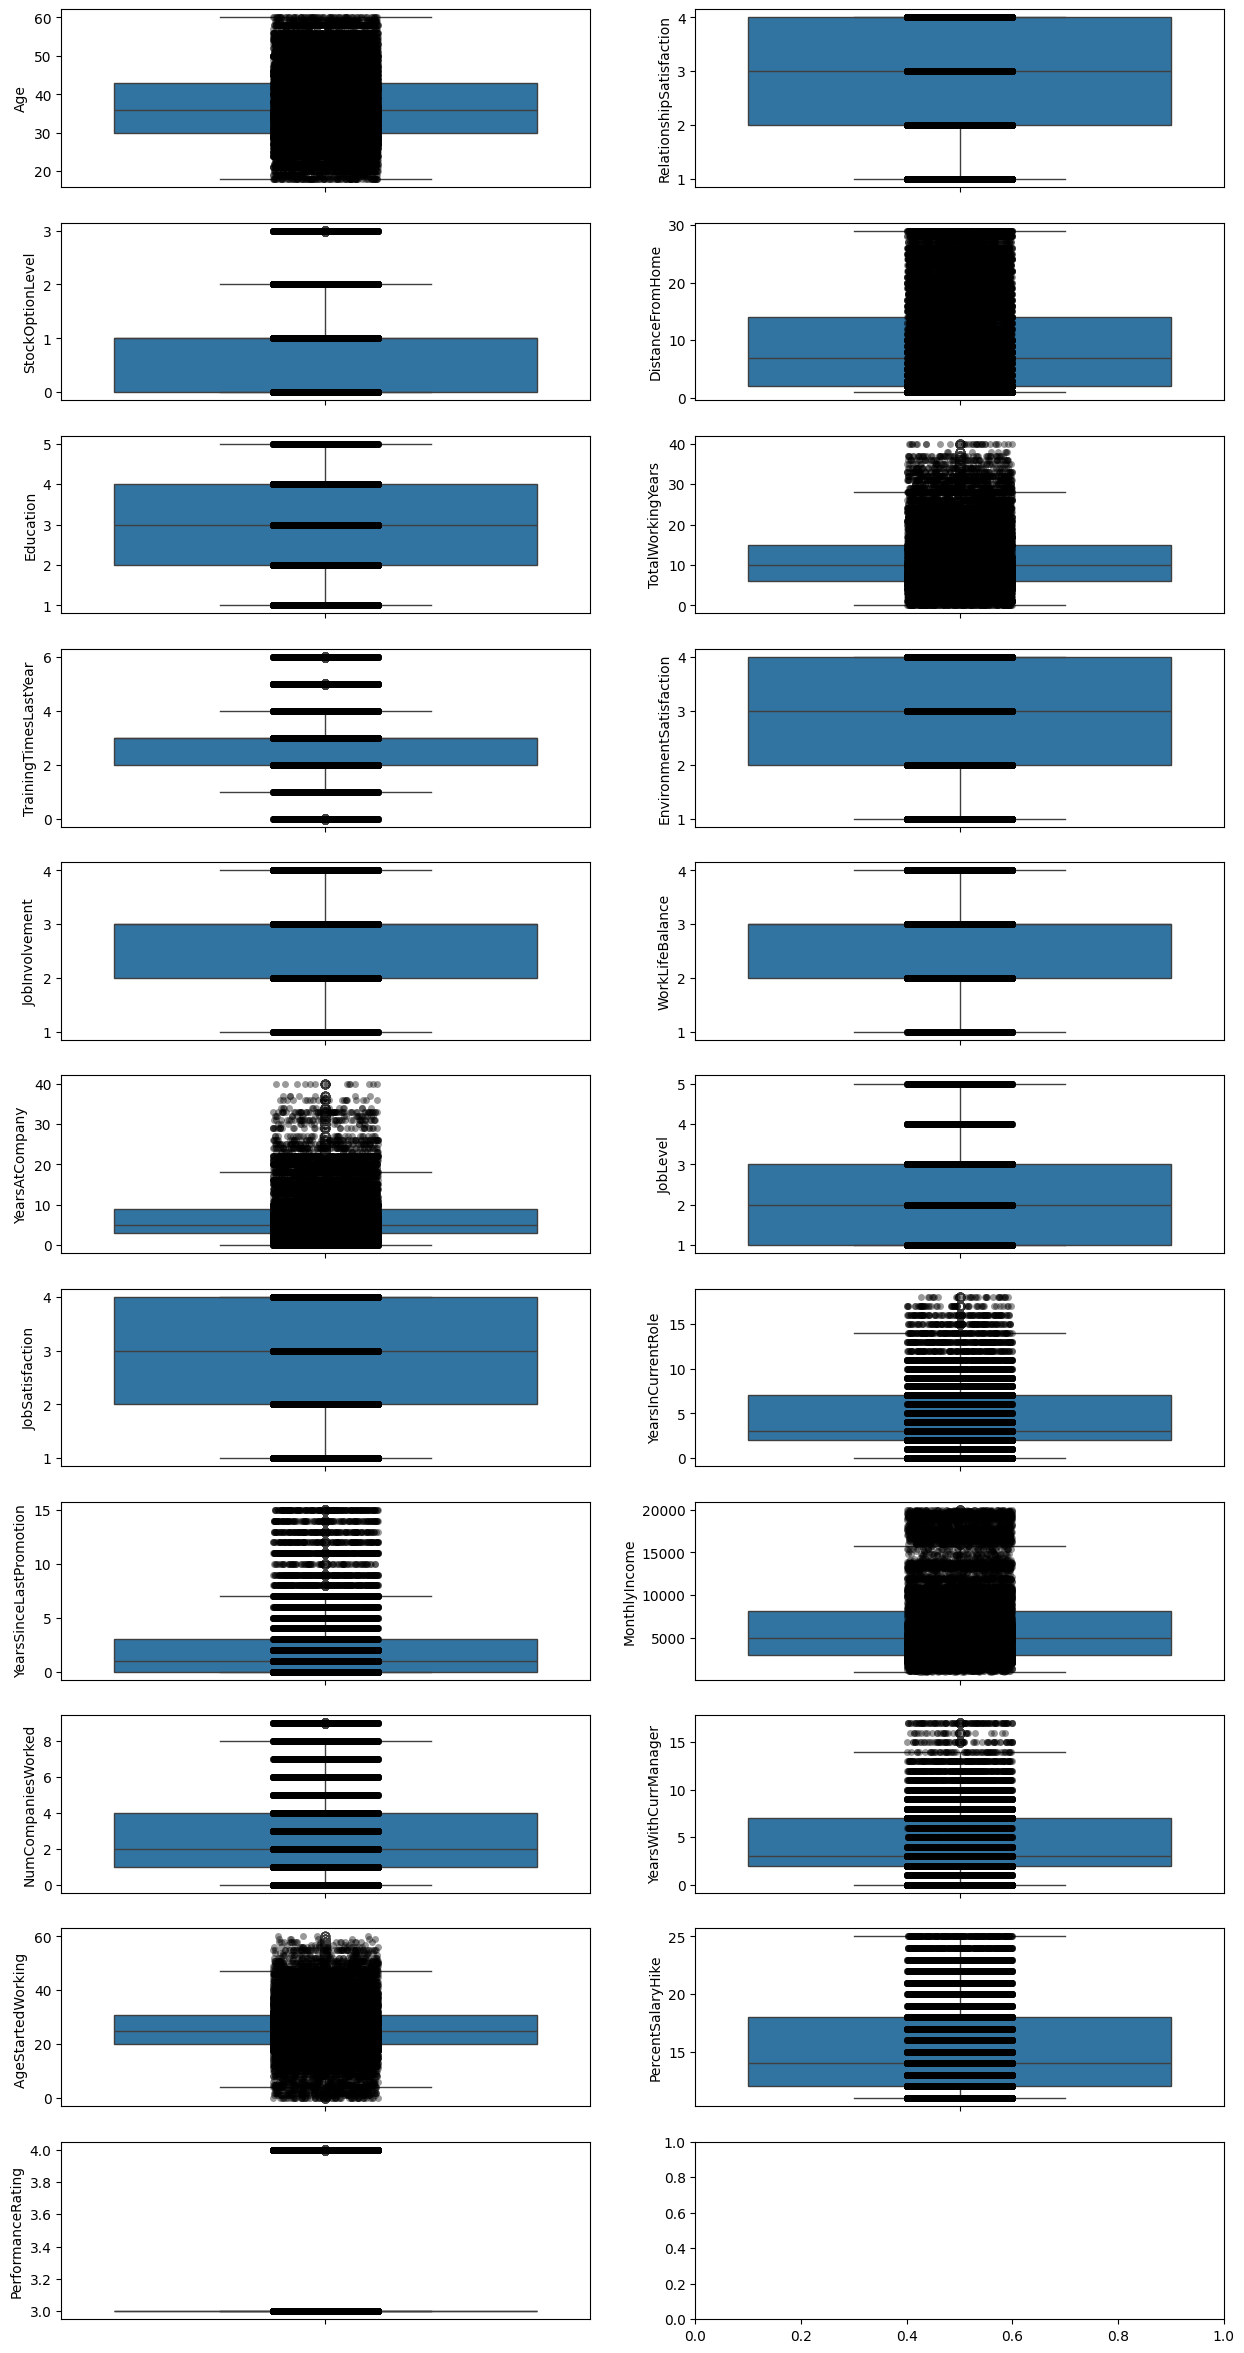

In [211]:
nrows=11
ncols=2

fig, ax = plt.subplots(nrows=11, ncols=2, figsize = (15, 30))

for i, col in enumerate(df.select_dtypes('number').columns):

    idx_row = i % nrows
    idx_col = i % ncols

    #print(idx_row, idx_col)

    sns.boxplot(data = df, y = col, ax = ax[idx_row, idx_col])
    sns.stripplot(data = df, y = col, ax = ax[idx_row, idx_col], color = 'black', alpha = 0.4)

We decided to keep outliers, because they are not unreal

Analysing our Target

In [212]:
df['Attrition'].value_counts()

Attrition
Current employee         19370
Voluntary Resignation     3601
Termination                 87
Name: count, dtype: int64

For this project we are going to work with "employee satisfaction". Therefore, employees who were fired, will be removed from our dataset.    
Then we will have just two classes "current employee" and "voluntary resignation".

In [213]:
# Deleting 'Termination'
df_model = df[df['Attrition'] != 'Termination']
df_model['Attrition'].value_counts()

Attrition
Current employee         19370
Voluntary Resignation     3601
Name: count, dtype: int64

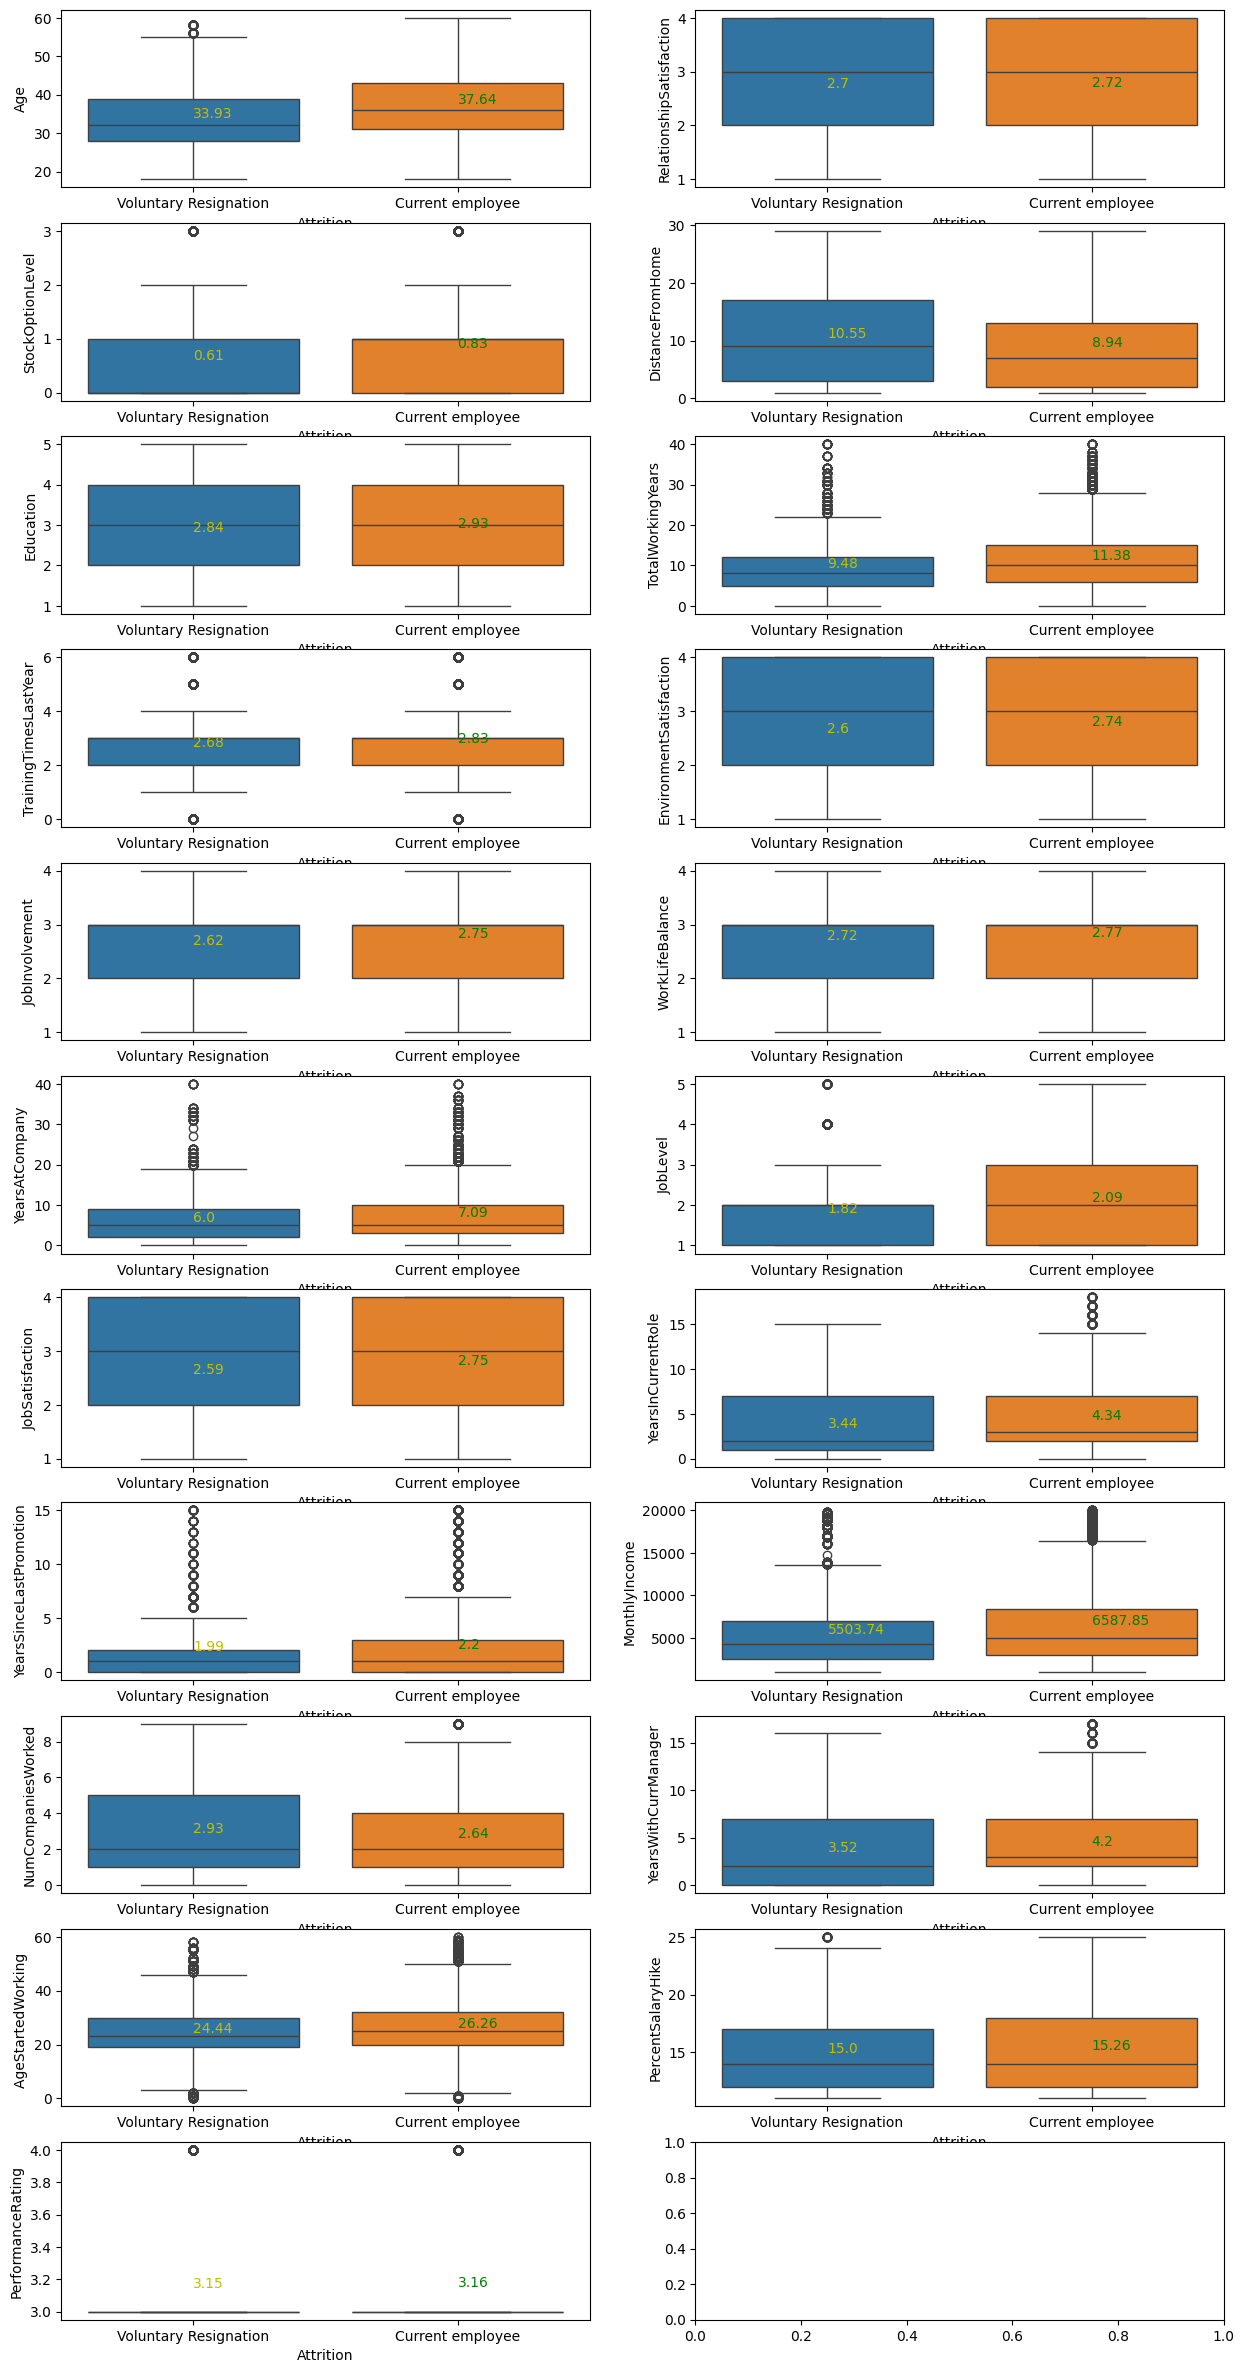

In [214]:
nrows=11
ncols=2

fig, ax = plt.subplots(nrows=11, ncols=2, figsize = (15, 30))

for i, col in enumerate(df_model.select_dtypes('number').columns):

    idx_row = i % nrows
    idx_col = i % ncols

    sns.boxplot(data = df_model, x = 'Attrition', y = col, ax = ax[idx_row, idx_col], hue= 'Attrition', )
    #sns.stripplot(data = df_model, x = 'Attrition', y = col, ax = ax[idx_row, idx_col], color = 'black', alpha = 0.1)

    ax[idx_row, idx_col].annotate(xy = (0, df_model[df_model['Attrition'] == 'Voluntary Resignation'][col].mean()),
     text = round(df_model[df_model['Attrition'] == 'Voluntary Resignation'][col].mean(), 2), color = 'y')

    ax[idx_row, idx_col].annotate(xy = (1, df_model[df_model['Attrition'] == 'Current employee'][col].mean()),
    text = round(df_model[df_model['Attrition'] == 'Current employee'][col].mean(),2), color = 'g')

    

Some conclusions based on the most significant differences between the two groups:

1. **Age:**  
   Employees who resign voluntarily are significantly younger (33.93 years) than those who stay (37.64 years). Younger employees may be more likely to seek new opportunities.

2. **Distance from Home (DistanceFromHome):**  
   The average distance from home to work is higher for those who resign (10.55) compared to those who stay (8.94). Longer distances may be an important factor in the decision to leave.

3. **Monthly Income:**  
   Employees who stay with the company have a significantly higher average monthly income (6587.85) than those who resign (5503.74). This suggests that higher compensation may help retain talent.

4. **Years at Company:**  
   Employees who resign have a significantly shorter average tenure (6 years) compared to current employees (7.09 years). This indicates that long-term employees are more likely to stay.

5. **Job Level:**  
   Employees who stay tend to hold higher positions (2.09) than those who resign (1.82). This suggests that career growth may play an important role in retention.

In [215]:
df_model['Attrition'] = df_model['Attrition'].apply(lambda x: 0 if x == 'Current employee' else 1)

/tmp/ipykernel_2711/3266270084.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['Attrition'] = df_model['Attrition'].apply(lambda x: 0 if x == 'Current employee' else 1)


In [216]:
# def drop_correlated(df):

#     df = df.copy()

#     df_numeric = df.select_dtypes('number')

#     combinations = list(itertools.combinations(df_numeric, 2))

#     vars_to_drop = []

#     for combination in combinations:

#         correlation = abs(stats.pearsonr(df_numeric[combination[0]], df_numeric[combination[1]])[0])

#         if correlation >= 0.9:

#             corr_1 = abs(stats.pearsonr(df_numeric[combination[0]], df_numeric['Attrition'])[0])

#             corr_2 = abs(stats.pearsonr(df_numeric[combination[1]], df_numeric['Attrition'])[0])

#             if corr_1 > corr_2:

#                 vars_to_drop.append(combination[1])
            
#             else:

#                 vars_to_drop.append(combination[0])
    
#     print(vars_to_drop)

#     return df.drop(columns=vars_to_drop)

In [217]:
df_model = modeling_tools.drop_correlated(df_model, 'Attrition')
df_model.shape

['MonthlyIncome']


(22971, 29)

In [218]:
# def analyze_chi2(df: pd.DataFrame, target: str):

#     """Analyze Chi2 comparing Object Variables with Target

#         df: dataframe
#         target: target

#         return: p-value, contingency table
#     """

#     for col in df.select_dtypes('object'):

#         if col != target:

#             print(f"{col} x {target} p-value: {stats.chi2_contingency(pd.crosstab(df[col], df[target]))[1]}")

#             print(f"\n{pd.crosstab(df[col], df[target])}\n")

In [219]:
modeling_tools.analyze_chi2(df_model, 'Attrition')

BusinessTravel x Attrition p-value: 5.7340686633514585e-84

Attrition              0     1
BusinessTravel                
Non-Travel          2154   190
Travel_Frequently   3291  1072
Travel_Rarely      13925  2339

Department x Attrition p-value: 3.467519262809624e-37

Attrition                   0     1
Department                         
Human Resources           821   189
Research & Development  12968  2009
Sales                    5581  1403

EducationField x Attrition p-value: 8.164652936839391e-20

Attrition            0     1
EducationField              
Human Resources    367    75
Life Sciences     8151  1343
Marketing         2070   414
Medical           6134  1081
Other             1065   226
Technical Degree  1583   462

Gender x Attrition p-value: 0.14344258513938454

Attrition      0     1
Gender                
Female      7775  1398
Male       11595  2203

JobRole x Attrition p-value: 1.0278247325335007e-64

Attrition                     0    1
JobRole                 

We can observe that there is no relation between Gender and Attrition

# Modeling

## Model V1

In [220]:
X = df_model.drop('Attrition', axis = 1)
y = df_model['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.75, random_state= 1)

for data in [X_train, X_test, y_train, y_test]:
    print(data.shape)

(17228, 28)
(5743, 28)
(17228,)
(5743,)


In [221]:
num_cols = X.select_dtypes(include='number').columns.tolist()
cat_cols = X.select_dtypes(exclude='number').columns.tolist()

In [222]:
scaler = StandardScaler()
oh = OneHotEncoder()
model = LogisticRegression()
numerical_imputer = SimpleImputer(strategy='median')
categorical_imputer = SimpleImputer(strategy='most_frequent')
rfe = RFECV(cv= 5, estimator= LogisticRegression(), scoring= 'accuracy')

In [223]:
numerical_preprocessor = Pipeline(steps=[('num_imputer', numerical_imputer),('scaler', scaler)])
categorical_preprocessor = Pipeline(steps=[('cat_imputer', categorical_imputer),('encoder', oh)])


preprocessor = ColumnTransformer(transformers= [('num_preprocessor',numerical_preprocessor, num_cols),
                                                ('cat_preprocessor', categorical_preprocessor, cat_cols)])

pipeline = Pipeline(steps=[('preprocessor', preprocessor),('model', model)])

In [224]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_preprocessor',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'DistanceFromHome',
                                                   'Education',
                                                   'EnvironmentSatisfaction',
                                                   'JobInvolvement', 'JobLevel',
                                                   'JobSatisfaction',
                                                   'NumCompaniesWorked',
                                                   'PercentSalaryHike',
                                                   'PerformanceRating',...
                                                   'YearsInCurrentRole',
                                                   'YearsSinceLastPromotion',
                                                   'YearsWithCurrManager',
                                                   'AgeStartedWorking ']),
                                                 ('cat_preprocessor',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  ['BusinessTravel',
                                                   'Department',
                                                   'EducationField', 'Gender',
                                                   'JobRole', 'MaritalStatus',
                                                   'OverTime',
                                                   'Employee Source'])])),
                ('model', LogisticRegression())])

Precision: 0.6215139442231076
Recall: 0.11702925731432859
Specificity: 0.9869523417113034


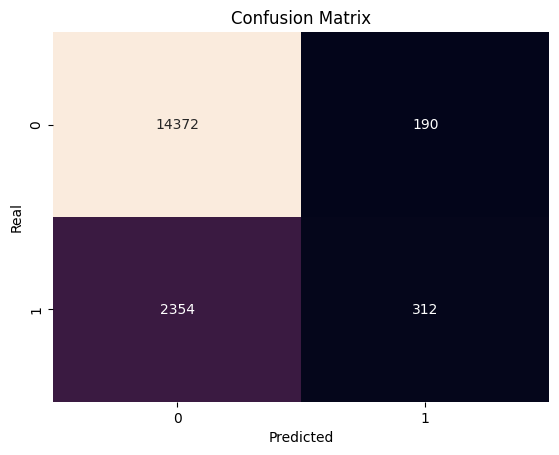

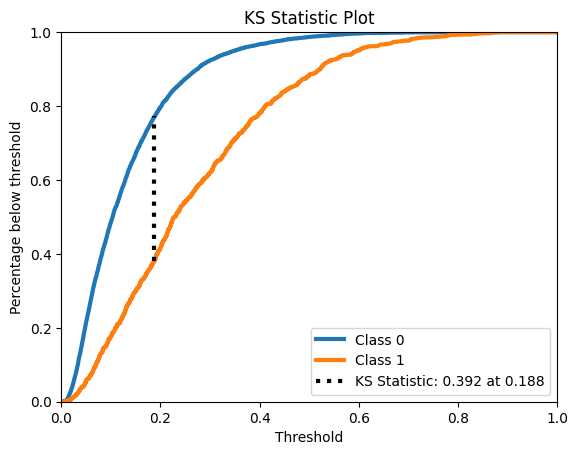

In [225]:
y_pred_train = pipeline.predict(X_train)
y_proba_train = pipeline.predict_proba(X_train)

tn, fp, fn, tp = confusion_matrix(y_train, y_pred_train).ravel()

sns.heatmap(confusion_matrix(y_true= y_train, y_pred= y_pred_train), annot=True, fmt='.0f', cbar=False)
plt.ylabel("Real")
plt.xlabel("Predicted")
plt.title("Confusion Matrix")

print(f"Precision: {precision_score(y_true= y_train, y_pred= y_pred_train)}")
print(f"Recall: {recall_score(y_true= y_train, y_pred= y_pred_train)}")
print(f"Specificity: {tn / (tn + fp)}")

skplot.plot_ks_statistic(y_true=y_train, y_probas=y_proba_train)
plt.show()

Precision: 0.6265060240963856
Recall: 0.11122994652406418
Specificity: 0.9871048252911814


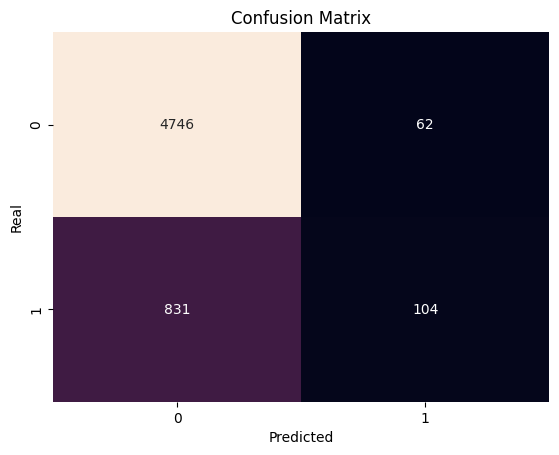

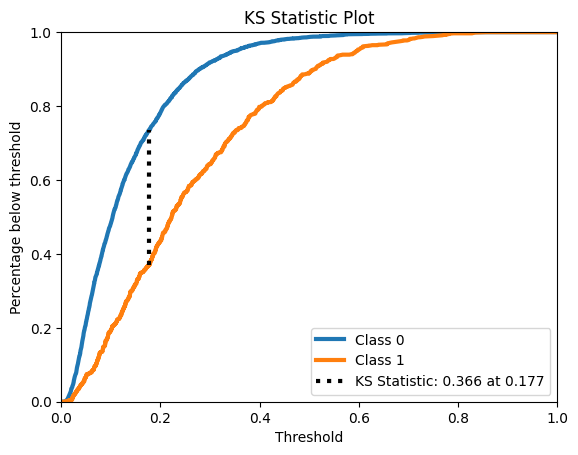

In [226]:
y_pred_test = pipeline.predict(X_test)
y_proba_test = pipeline.predict_proba(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_test).ravel()

sns.heatmap(confusion_matrix(y_true= y_test, y_pred= y_pred_test), annot=True, fmt='.0f', cbar=False)
plt.ylabel("Real")
plt.xlabel("Predicted")
plt.title("Confusion Matrix")

print(f"Precision: {precision_score(y_true= y_test, y_pred= y_pred_test)}")
print(f"Recall: {recall_score(y_true= y_test, y_pred= y_pred_test)}")
print(f"Specificity: {tn / (tn + fp)}")

skplot.plot_ks_statistic(y_true=y_test, y_probas=y_proba_test)
plt.show()

In [227]:
coefs = pipeline['model'].coef_[0]
variables = pipeline['preprocessor'].get_feature_names_out()
variables = [re.sub(string = x, pattern = 'num_preprocessor__|cat_preprocessor__', repl='') for x in variables]

df_coef = pd.DataFrame({'variable': variables, 'coef': coefs})


Text(0.5, 1.0, 'Coeficientes do Modelo')

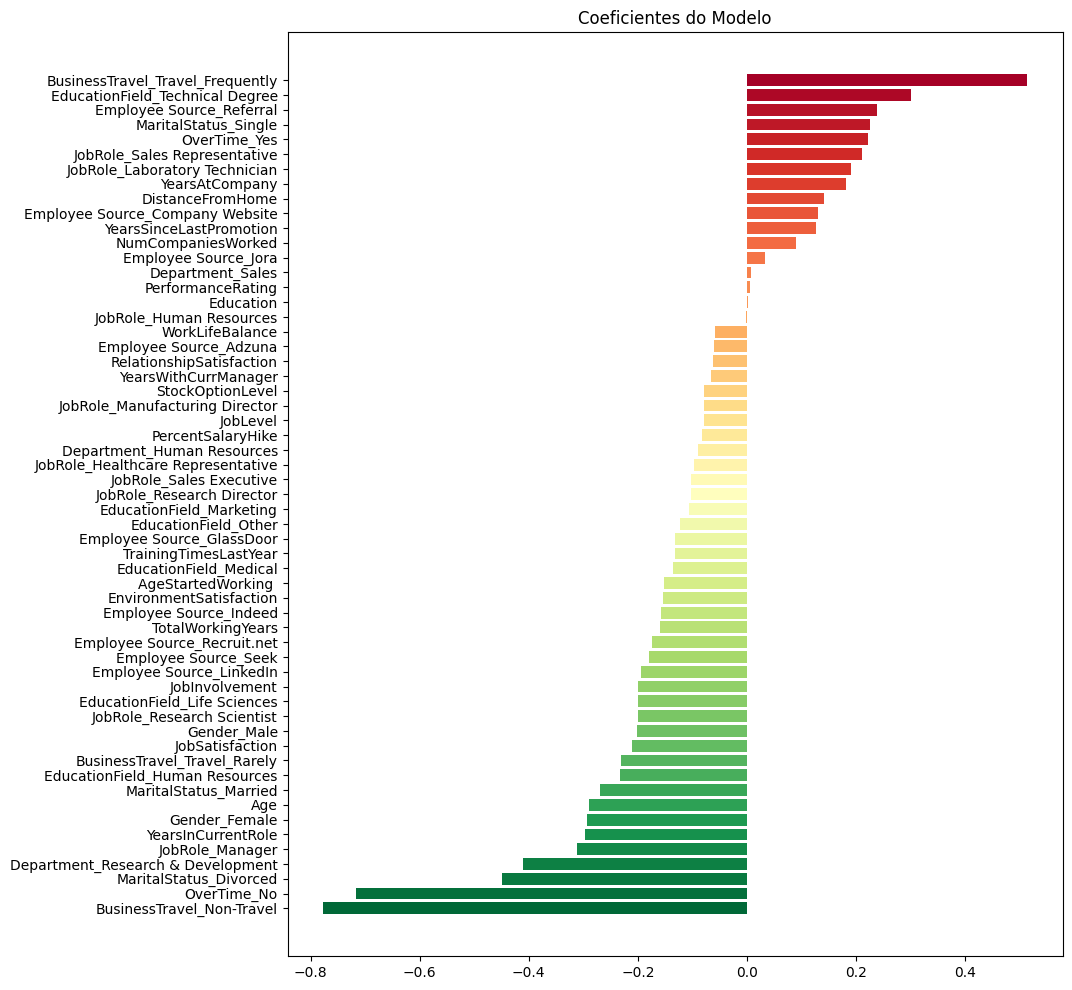

In [228]:
colors = plt.cm.RdYlGn_r(np.linspace(0, 1, df_coef.shape[0]))
plt.figure(figsize = (10,12))
plt.barh(data = df_coef.sort_values('coef'), width= 'coef', y = 'variable', color = colors)
plt.title('Coeficientes do Modelo')

The coefficients in logistic regression indicate the strength and direction of the association between each feature (attribute) and the probability of the target event, which in this case is voluntary attrition (Attrition). 

In other words, analyzing the coefficients of a logistic regression model helps us understand the influence of each attribute on the probability of the event of interest. Positive coefficients indicate that as the value of the attribute increases, the probability of the employee voluntarily resigning also increases.    



**Let's interpret the 10 coefficients with the highest values:**


**BusinessTravel_Travel_Frequently (0.494839)**  
Employees who frequently travel for business are more likely to voluntarily resign. This coefficient is highly significant, suggesting that frequent travel may be a source of stress or dissatisfaction.

**EducationField_Technical Degree (0.275768)**  
Employees with a technical degree are more likely to voluntarily resign compared to those in other educational fields. This may indicate that these employees have more opportunities in the job market or that their expectations are not being met.

**Employee Source_Referral (0.257281)**  
Employees hired through referrals are more likely to voluntarily resign. This may suggest that, despite being referred, they might not be as aligned with the company as other employees.

**MaritalStatus_Single (0.213240)**  
Single employees are more likely to voluntarily resign compared to married employees or those in other marital statuses. This could be due to greater flexibility and fewer personal responsibilities.

**JobRole_Laboratory Technician (0.213197)**  
Employees working as laboratory technicians are more likely to voluntarily resign. This may indicate dissatisfaction with the specific role or the work environment.

**OverTime_Yes (0.183383)**  
Employees who work overtime are more likely to voluntarily resign. This suggests that excessive workloads may lead to burnout and dissatisfaction.

**DistanceFromHome (0.160642)**  
Greater distance from home to work is associated with a higher likelihood of voluntary resignation. Long commutes may cause fatigue and dissatisfaction.

**YearsSinceLastPromotion (0.157113)**  
Employees who have gone more years since their last promotion are more likely to voluntarily resign. This may indicate dissatisfaction with growth opportunities within the company.

**JobRole_Sales Representative (0.126106)**  
Employees working as sales representatives are more likely to voluntarily resign. This role may involve high performance pressure or lack of adequate support.

**YearsAtCompany (0.105078)**  
The longer an employee stays at the company, the higher the likelihood of voluntary resignation. This may indicate that, after a certain period, employees may feel stagnant or seek new opportunities.

**Conclusion:**  
Positive coefficients indicate that these factors increase the likelihood of voluntary resignation. Understanding these factors can help the company take preventive measures, such as improving working conditions, offering growth opportunities, and minimizing the need for overtime, to reduce voluntary turnover rates.

## Model V2

In [177]:
X = df_model.drop('Attrition', axis = 1)
y = df_model['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.75, random_state= 1)

for data in [X_train, X_test, y_train, y_test]:
    print(data.shape)

(17228, 28)
(5743, 28)
(17228,)
(5743,)


In [178]:
num_cols = X.select_dtypes(include='number').columns.tolist()
cat_cols = X.select_dtypes(exclude='number').columns.tolist()

In [179]:
scaler = StandardScaler()
oh = OneHotEncoder()
model = LogisticRegression()
numerical_imputer = SimpleImputer(strategy='median')
categorical_imputer = SimpleImputer(strategy='most_frequent')
rfe = RFECV(cv= 5, estimator= LogisticRegression(), scoring= 'accuracy')

In [185]:
numerical_preprocessor = Pipeline(steps=[('num_imputer', numerical_imputer),('scaler', scaler)])
categorical_preprocessor = Pipeline(steps=[('cat_imputer', categorical_imputer),('encoder', oh)])


preprocessor = ColumnTransformer(transformers= [('num_preprocessor',numerical_preprocessor, num_cols),
                                                ('cat_preprocessor', categorical_preprocessor, cat_cols)])

pipeline = Pipeline(steps=[('preprocessor', preprocessor),('rfe',rfe),('model', model)], verbose= True)

In [186]:
pipeline.fit(X_train, y_train)

[Pipeline] ...... (step 1 of 3) Processing preprocessor, total=   0.2s
[Pipeline] ............... (step 2 of 3) Processing rfe, total= 2.3min
[Pipeline] ............. (step 3 of 3) Processing model, total=   1.0s


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_preprocessor',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'DistanceFromHome',
                                                   'Education',
                                                   'EnvironmentSatisfaction',
                                                   'JobInvolvement', 'JobLevel',
                                                   'JobSatisfaction',
                                                   'NumCompaniesWorked',
                                                   'PercentSalaryHike',
                                                   'PerformanceRating',...
                                                 ('cat_preprocessor',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  ['BusinessTravel',
                                                   'Department',
                                                   'EducationField', 'Gender',
                                                   'JobRole', 'MaritalStatus',
                                                   'OverTime',
                                                   'Employee Source'])])),
                ('rfe',
                 RFECV(cv=5, estimator=LogisticRegression(),
                       scoring='accuracy')),
                ('model', LogisticRegression())],
         verbose=True)

Precision: 0.6244635193133047
Recall: 0.109152288072018
Specificity: 0.9879824199972531


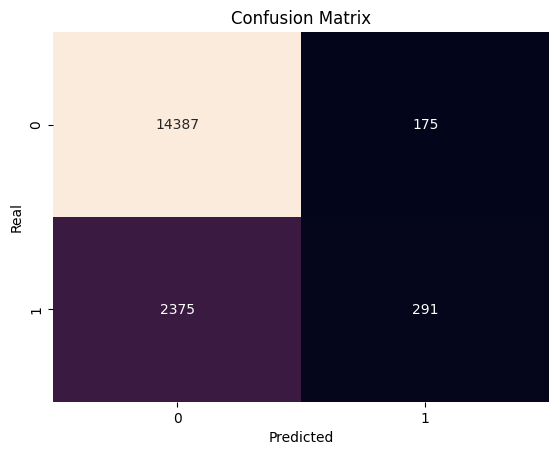

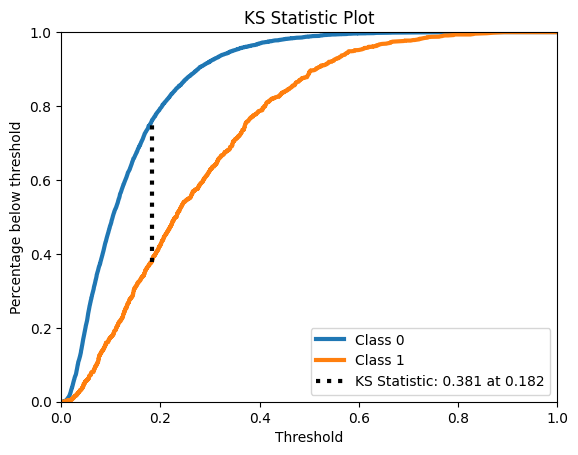

In [197]:
y_pred_train = pipeline.predict(X_train)
y_proba_train = pipeline.predict_proba(X_train)

tn, fp, fn, tp = confusion_matrix(y_train, y_pred_train).ravel()

sns.heatmap(confusion_matrix(y_true= y_train, y_pred= y_pred_train), annot=True, fmt='.0f', cbar=False)
plt.ylabel("Real")
plt.xlabel("Predicted")
plt.title("Confusion Matrix")

print(f"Precision: {precision_score(y_true= y_train, y_pred= y_pred_train)}")
print(f"Recall: {recall_score(y_true= y_train, y_pred= y_pred_train)}")
print(f"Specificity: {tn / (tn + fp)}")

skplot.plot_ks_statistic(y_true=y_train, y_probas=y_proba_train)
plt.show()

Precision: 0.6233766233766234
Recall: 0.10267379679144385
Specificity: 0.987936772046589


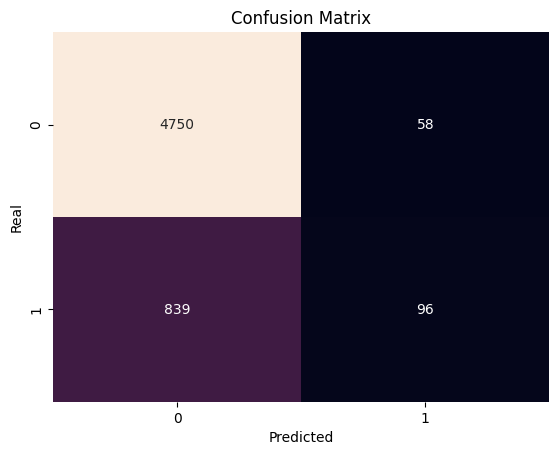

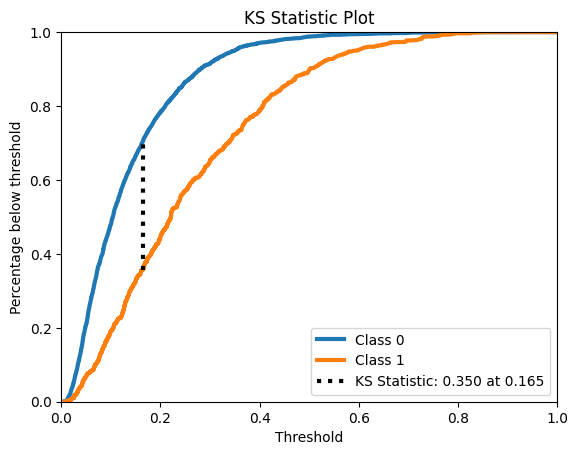

In [198]:
y_pred_test = pipeline.predict(X_test)
y_proba_test = pipeline.predict_proba(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_test).ravel()

sns.heatmap(confusion_matrix(y_true= y_test, y_pred= y_pred_test), annot=True, fmt='.0f', cbar=False)
plt.ylabel("Real")
plt.xlabel("Predicted")
plt.title("Confusion Matrix")

print(f"Precision: {precision_score(y_true= y_test, y_pred= y_pred_test)}")
print(f"Recall: {recall_score(y_true= y_test, y_pred= y_pred_test)}")
print(f"Specificity: {tn / (tn + fp)}")

skplot.plot_ks_statistic(y_true=y_test, y_probas=y_proba_test)
plt.show()

In [199]:
coefs = pipeline['model'].coef_[0]
variables = pipeline['preprocessor'].get_feature_names_out()[pipeline['rfe'].support_]
variables = [re.sub(string = x, pattern = 'num_preprocessor__|cat_preprocessor__', repl='') for x in variables]

df_coef = pd.DataFrame({'variable': variables, 'coef': coefs})


Text(0.5, 1.0, 'Coeficientes do Modelo')

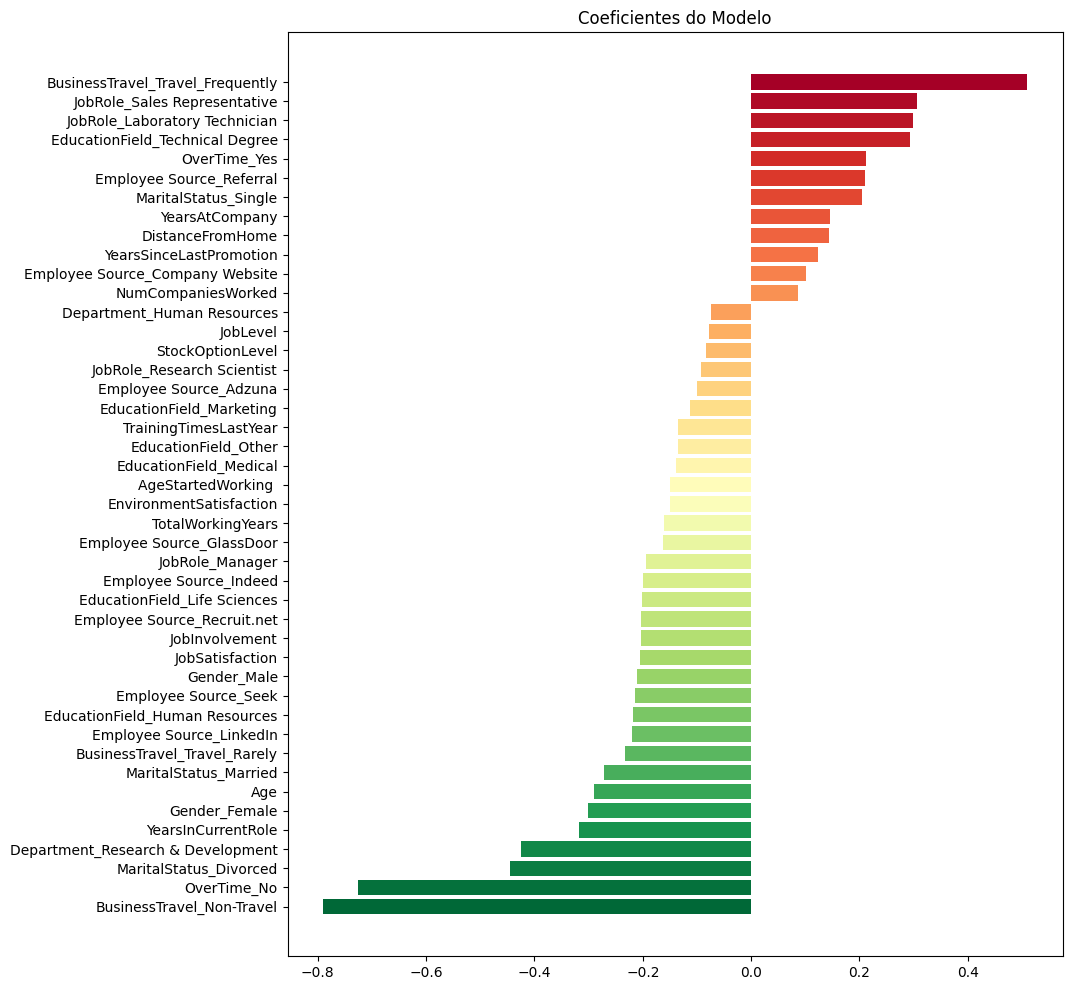

In [201]:
colors = plt.cm.RdYlGn_r(np.linspace(0, 1, df_coef.shape[0]))
plt.figure(figsize = (10,12))
plt.barh(data = df_coef.sort_values('coef'), width= 'coef', y = 'variable', color = colors)
plt.title('Coeficientes do Modelo')